In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


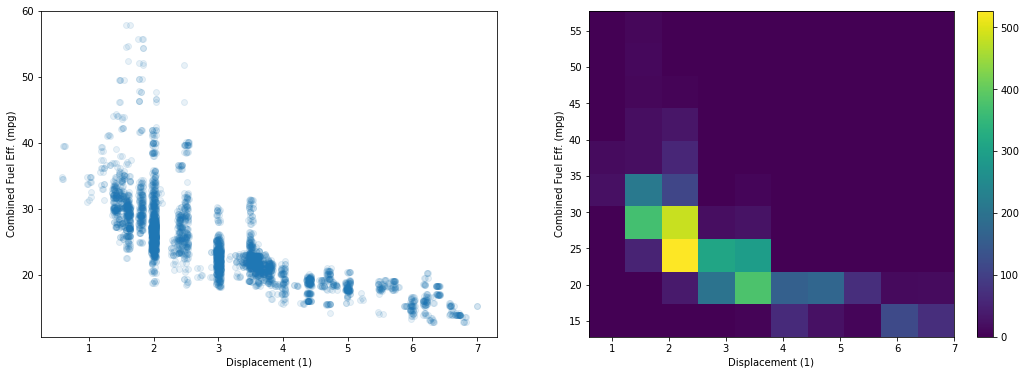

In [3]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Example 2. Heat plot - Set a minimum bound on counts and a reverse color map

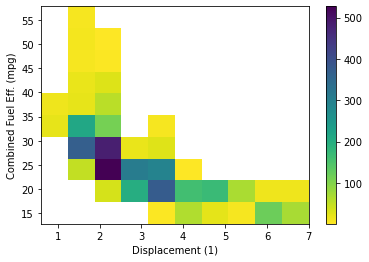

In [4]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Example 3. Heat plot - Specify bin edges

In [5]:
fuel_econ.displ.describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [6]:
fuel_econ.comb.describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

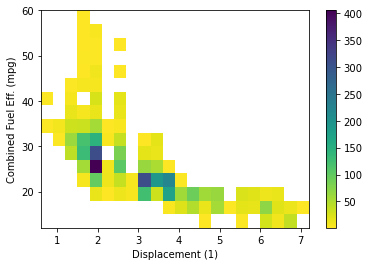

In [7]:
# Specify bin edges by the descriptive stats above
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

## Annotations on each cell
If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

## Example 4. Add text annotation on each cell using pyplot.text() function

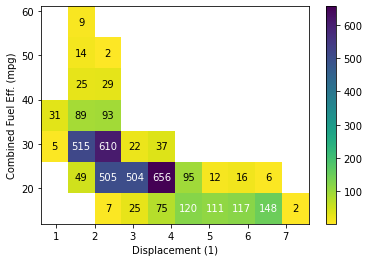

In [8]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'black')


# Practice
- Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). **Use a heat map to depict the data.** How strong is this trend?

In [13]:
fuel_econ.displ.describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [14]:
fuel_econ.co2.describe()

count    3929.000000
mean      376.564266
std        92.338892
min        29.000000
25%       315.000000
50%       369.000000
75%       429.000000
max       692.000000
Name: co2, dtype: float64

In [28]:
# Specify bin edges by the descriptive stats above
#bins_x = np.arange(0.6, 7+0.3, 0.3)
#bins_y = np.arange(20, 692+3, 3)
###################
bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4)
bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)

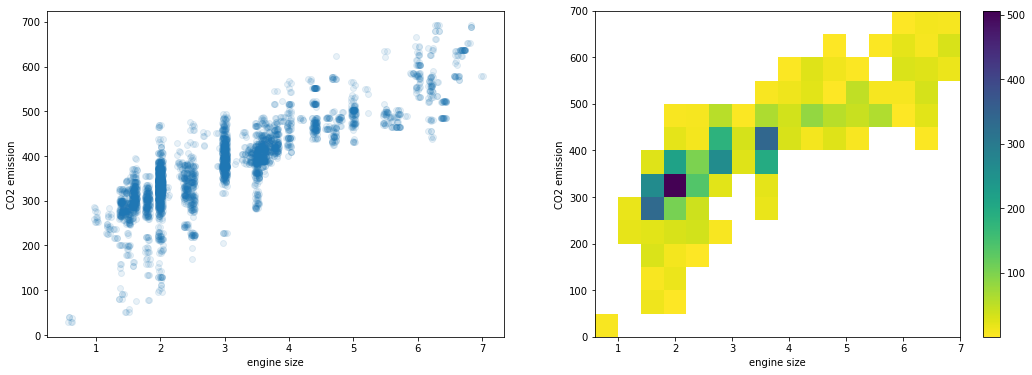

In [29]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'co2', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('engine size')
plt.ylabel('CO2 emission');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('engine size')
plt.ylabel('CO2 emission');